### Chapter4 Feature Engineering

특정 어플리케이션에 가장 적합한 데이ㅐ터 표현을 찾는 것을 **특성 공학**이라 하며, 올바른 데이터 표현은 지도학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 큰 영향을 미친다.

#### 4.1 범주형 변수

In [4]:
import pandas as pd
import numpy as np

In [2]:
import mglearn

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [1]:
import os

# 이 파일은 열 이름을 나타내는 헤더가 없음. 따라서 header=None으로 지정하고,
# "names" 매개변수로, 열 이름을 제공

In [7]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                  header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'gender',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [8]:
# 예제 를 위한 데이터 셋
df = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [9]:
# IPython.display function은 주피터 노트북을 위해 포맷팅 된 출력을 만든다.
display(df)

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [10]:
# 범주형 데이터 문자열 확인
print(df.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [11]:
# pandas에서는 get_dummies함수를 사용해서, 데이터를 매우 쉽게 인코딩 가능.
# get_dummies 함수는 객체 타입(문자열 같은)이나 범주형을 가진 열을 자동으로 변환
print("원본 특성: \n", list(df.columns), "\n")
data_dummies = pd.get_dummies(df)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [12]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy Array 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}   y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)   y.shape: (32561,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test Score: {:.2f}".format(logreg.score(X_test, y_test)))

Test Score: 0.81


C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Caution

1. 위 예제에서, 훈련 데이터와 테스트 데이터를 모두 담고 있는 DataFrame을 사용해 get_dummies호출했음.
1. 이는 훈련 세트와 테스트 세트에 범주형 값이 같은 방식으로 표현되어야 하기 때문.
----
1. 훈련 세트와 테스트 세트를 두 개의 서로 다른 DataFrame으로 가지고 있다고 가정해보면,
1. workclass 특성의 "Private Employee"값이 테스트 세트에 나타나지 않으면 pandas는 이 특성의 값이 세 개 뿐이라고 판단하고, 세 개의 가변수 특성을 만든다. 
1. 따라서 DataFrame을 사용해 get_dummies 함수를 호출하듯이, 또는 각각 get_dummies를 호출한 후, 훈련 세트와 테스트 세트의 열 이름을 비교하고 같은 속성인지 확인해야 한다.

#### 4.1.2 숫자로 표현된 범주형 특성


In [15]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame

demo_df = pd.DataFrame({'Numeric Features' : [0, 1, 2, 1], 
                       'Categorical Features' : ['Socks', 'Fox', 'Socks', 'Box']})

display(demo_df)

,Numeric Features,Categorical Features
0,0,Socks
1,1,Fox
2,2,Socks
3,1,Box


In [16]:
# 숫자 특성을 가변수로 만들고 싶다면, columns매개변수에 인코딩하고 싶은 열을 명시. 그러면 두 특성을 모두 범주형으로 간주.
demo_df['Numeric Features'] = demo_df['Numeric Features'].astype(str)
display(pd.get_dummies(demo_df, columns=['Numeric Features' , 'Categorical Features']))

,Numeric Features_0,Numeric Features_1,Numeric Features_2,Categorical Features_Box,Categorical Features_Fox,Categorical Features_Socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


#### 4.2 구간 분할, 이산화 그리고 선형 모델, 트리 모델

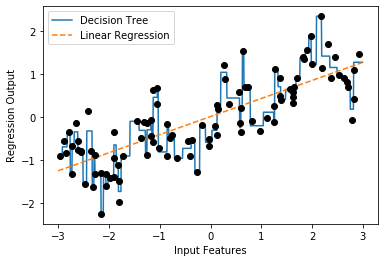

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc="best")

- 선형 모델은 선형 관계로만 모델링, 곧 특성이 하나일때 직선으로 나타남.
- 연속형 데이터에 아주 강력한 선형모델을 만드는 방법 하나로, 한 특성열 여러 특성으로 나누는 **구간 분할(bining)** 이 있다. (이산화)
- 이 특성의 입력값 범위(위 예제에서, -3 ~ 3 까지)가 나뉘어 여러 구간, 예를 들면 10개로 되어 있다고 가정해보면.
- 각 데이터 포인트가 어떤 구간에 속하는지로 나타낼 수 있다. 이러기 위해서는, 먼저 구간을 정해야 한다. 아래 예제에서는  np.linspace함수로 11개의 지점을 생성해, 10개의 구간을 만들었다. 

In [21]:
bins = np.linspace(-3, 3, 11)
print("구간: {}".format(bins))

구간: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- 이후, np.digitize 함수를 사용하면, 각 데이터 포인트가 어느 구간에 속하는지 기록할 수 있다.

In [22]:
which_bin = np.digitize(X, bins=bins)
print("\n Data Point:\n", X[:5])
print("\n Data Point의 소속 구간:\n", which_bin[:5])


 Data Point:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 Data Point의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- 이렇게 함으로써, wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지로 인코딩한 범주형 특성으로 변환했다. 
- 이 데이터에, scikit-learn model을 적용하기 위해서, preprocessing modul의 OneHotEncoder로 이산적인 이 특성을, one-hot encoding으로 변환한다.

In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

# encoder.fit은 which_bin에 나타난 유일한 값을 찾는다.
enc.fit(which_bin)

# one-hot encoindg으로 변환.
X_binned = enc.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input Features')

C:\Users\kh_le\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kh_le\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kh_le\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kh_le\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kh_le\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kh_le\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from c

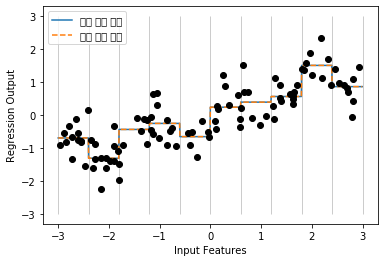

In [26]:
# one-hot encoindg data로 선형 회귀 모델과 결정 트리 모델을, 새로 만들어보면.
line_binned = enc.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")

- 선형회귀모델과 결정트리가 같은 예측을 만들어서, 파선과 실선이 겹쳐보인다.
- 구간별로 이 두 모델이 예측한 것은 **상숫값**이다.
- 각 구간 안에는, 특성의 값이 상수므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측할 것이다.
- 구간으로 나눈 특성을 사용하기 전과 비교해보면, 각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해짐.
- 반면, 결정트리는 덜 유연해짐. 이는 트리 모델이 데이터를 자유로이 나눠 학습할 수 있으므로, 특성의 값을 구간으로 나누는 것이 아무런 의미가 없음.
- 다르게 생각해보면, 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다고 볼 수 있다. 거기다, 구간 나누기는 특성마다 따로 해야하지만,
- 결정 트리는 한 번에 여러 특성을 살필 수 있다. 하지만 선형모델은 이런 변환으로부터 큰 이득을 얻었다.
- 일부 특성과 출력이 비선형 관계이나, 용량이 매우 크고, 고차원 데이터셋이라 선형 모델을 사용해야 한다면, **구간 분할**이 모델 성능을 높이는데 아주 좋은 방법이 될 수 있다.

#### 4.3 상호작용과 다항식

- 특별히, 특성을 풍푸하게 나타내는 또 하나의 방법은, 원본 데이터에 **상호작용 (interaction)과 다항식 (polynomial)**을 추가하는 것이다. 
- 앞선 예쩨로, wave 데이터셋의 각 구간에 대해 상숫값을 학습함. 그런데, 선형 모델은 이런 절편뿐만 아니라 **기울기**도 학습할 수 있음.
- 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가한느 것.

In [27]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


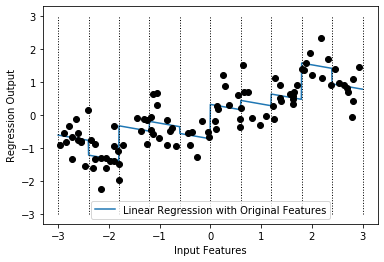

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Linear Regression with Original Features')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc='best')
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.plot(X[:, 0], y, 'o', c='k')

- 학습된 기울기는 음수이고 모든 구간에 걸쳐 동일합니다.
- x축 특성이 하나이므로, 기울기도 하나임.
- 따라서, 각 구간에서 다른 기울기를 가지도록, 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있다.
- 이 특성이 구간 특성과 원본 특성의 곱이다. 

In [30]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [32]:
X * X_binned

array([[-0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.39196365,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.59195091,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        , -2.06388816, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -2.06403288, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-2.65149833, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        

- 데이터셋은 이제, 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가진다.
- 이 곱셈 특성을 각 구간에 대한 x축 특성의 복사본이라고 생각할 수 있음.
- 즉 이 값은 구간 안에서는 원본 특성이고, 다른 곳에서는 0임.

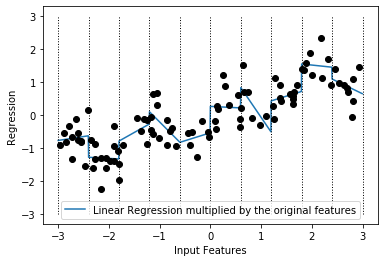

In [33]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Linear Regression multiplied by the original features')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression")
plt.xlabel("Input Features")
plt.legend(loc='best')